In [2]:
import struct

f=open('Jan9e10.D24','rb')
file=f.read()

#cuadrar función
def search (data,format:str,start:int,end:int,size:int):
    list=[]
    position=1
    for byte in data[start:end]:
        position-=1
        if position == 0:
            position=size
        i=data.index(byte)
        val=(struct.unpack(format,data[i:i+size]))[0]
        if position != size:
            continue
        list.append(val)        
    return list


In [23]:
nch=(struct.unpack('b',file[:1]))[0]
gain=search(file,'b',1,5,1)
global_freq=struct.unpack('f',file[5:9])[0]
eq_freq=struct.unpack('b',file[9:10])[0]
t_points=int(struct.unpack('f',file[10:14])[0])
ad_resol=struct.unpack('b',file[14:15])[0]

note_list=search(file,'c',28,106,1)
note=''
for letter in note_list:
    if letter == b'\x00':
        break
    str_letter=letter.decode('ascii')
    note+=str_letter

aux_channel=struct.unpack('b',file[111:112])[0]
aux_val=search(file,'f',112,127,4)

"""
Se debe poner un último atributo en search() (4) que tenga en cuenta distintos tamaños de 
valores como 'int' o 'float'. Para esto se debe tener en cuenta seguir el loop registrando cada
que se pase un múltiplo del tamaño. range()
"""


"\nSe debe poner un último atributo en search() (4) que tenga en cuenta distintos tamaños de \nvalores como 'int' o 'float'. Para esto se debe tener en cuenta seguir el loop registrando cada\nque se pase un múltiplo del tamaño. range()\n"

In [24]:
print(nch)
print(gain)
print(global_freq)
print(eq_freq)
print(t_points)
print(ad_resol)
print(note)
print(aux_channel)
print(aux_val)

2
[1, 4, 0, 0]
10000.0
1
1200
16
first 2 still in TEA 10 mM then back to helix ringer control every 30 secs
0
[2.0, 2.0, 2.0, 2.0]


In [25]:
#points=search(file,'H',128,128+2400,2)
points=struct.unpack(f'{t_points}H',file[128:128+t_points*2])


In [26]:
zero=2**(ad_resol-1)
count=0
ch1=[]
ch2=[]

for point in points:
    if count%2==0:
        ch1.append(point)
    else:
        ch2.append(point)
    count+=1

time=list(range(0,len(ch1)))
print((points))
print(len(ch1))
print(ch2)
print(time)


(32387, 23578, 32385, 23588, 32389, 23595, 32394, 23589, 32387, 23581, 32395, 23587, 32387, 23585, 32389, 23586, 32390, 23588, 32391, 23586, 32392, 23582, 32393, 23583, 32393, 23592, 32393, 23605, 32389, 23590, 32393, 23584, 32401, 23582, 32393, 23588, 32398, 23582, 32397, 23586, 32399, 23589, 32392, 23582, 32391, 23571, 32395, 23593, 32389, 23588, 32397, 23590, 32395, 23589, 32393, 23589, 32390, 23582, 32401, 23584, 32395, 23589, 32396, 23586, 32393, 23594, 32395, 23586, 32395, 23576, 32393, 23596, 32397, 23589, 32393, 23593, 32395, 23589, 32391, 23588, 32389, 23587, 32390, 23592, 32397, 23585, 32397, 23593, 32393, 23581, 32387, 23582, 32393, 23594, 32395, 23613, 32396, 23589, 32385, 23591, 32391, 23592, 32390, 23588, 32389, 23582, 32388, 23578, 32389, 23596, 32385, 23585, 32385, 23594, 32381, 23587, 32383, 23604, 32388, 23590, 32379, 23591, 32387, 23595, 32383, 23585, 32383, 23584, 32377, 23594, 32375, 23588, 32379, 23588, 32379, 23592, 32370, 23582, 32377, 23588, 32374, 23591, 32372

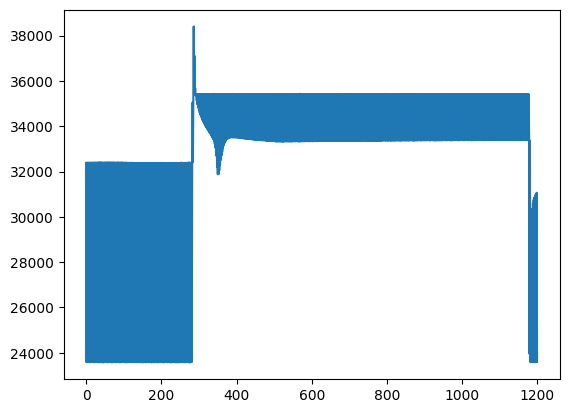

In [27]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()             
ax.plot(points)  
plt.show()  